In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [ ]:
# Define the path to your dataset in Google Drive
dataset_path = '/content/drive/MyDrive/dataset/shopping_behavior_updated.csv'

In [ ]:
# Use Pandas to read the CSV file
df = pd.read_csv(dataset_path)

In [ ]:
# Now, you can work with your dataset using the 'df' DataFrame
print(df.head())

   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previ

In [ ]:
print(df.columns)

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')


Mean Squared Error: 563.9059067340863


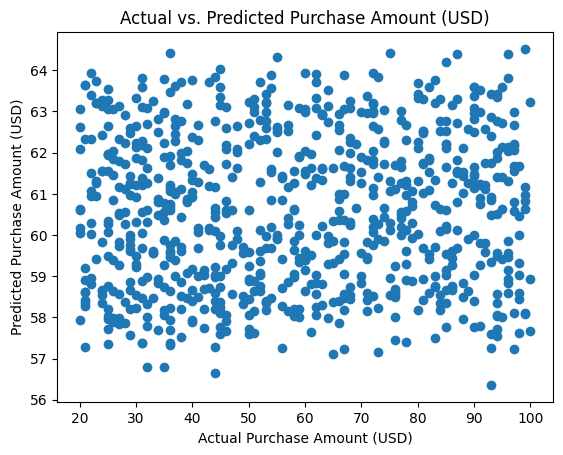

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Handle label encoding untuk kolom kategorikal
le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])

# Pilih fitur dan target yang berbeda
features = df[['Age', 'Review Rating', 'Previous Purchases']]
target = df['Purchase Amount (USD)']

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Normalisasi fitur menggunakan StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inisialisasi model SVR
svr_model = SVR(kernel='linear', C=1.0)

# Latih model
svr_model.fit(X_train_scaled, y_train)

# Lakukan prediksi
y_pred = svr_model.predict(X_test_scaled)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Visualisasi prediksi vs. aktual (Opsional)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Purchase Amount (USD)")
plt.ylabel("Predicted Purchase Amount (USD)")
plt.title("Actual vs. Predicted Purchase Amount (USD)")
plt.show()